# Imports

In [1]:
from pickle import load

from IPython.core.display_functions import display
from matplotlib import pyplot as plt
from numpy import array
from pandas import DataFrame
from pandas.plotting import table
from seaborn import heatmap

# Load models from file

In [2]:
file_names = [
    'randomforest',
    'kmeans',
    'pca',
    'gmm',
    'svm',
    'adaboost',
    'knn',
]

models = []
for model_name in file_names:
    with open(f'./out/models/{model_name}.pkl', 'rb') as file:
        model = load(file)
        models.append(model)

# Get result metrics

[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done   7 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done   8 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  10 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  11 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  12 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  13 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  14 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  15 tasks      | elaps

,Random Forest Classifier Scores
Accuracy,0.989744
Precision,0.988178
Recall,0.984208
F1-Score,0.986189


,K-means Anomaly Detection Scores
Accuracy,0.372037
Precision,0.372037
Recall,1.000000
F1-Score,0.542313


,PCA Anomaly Detection Scores
Accuracy,0.684343
Precision,0.558154
Recall,0.727248
F1-Score,0.631579


,GMM Anomaly Detection Scores
Accuracy,0.827613
Precision,0.689790
Recall,0.975204
F1-Score,0.808034


,SVM Classifier Scores
Accuracy,0.955061
Precision,0.966211
Recall,0.911068
F1-Score,0.937830


,AdaBoost Classifier Scores
Accuracy,0.960833
Precision,0.966623
Recall,0.926721
F1-Score,0.946252


,K-nearest Neighbour Classifier Scores
Accuracy,0.423572
Precision,0.317370
Recall,0.477351
F1-Score,0.381258


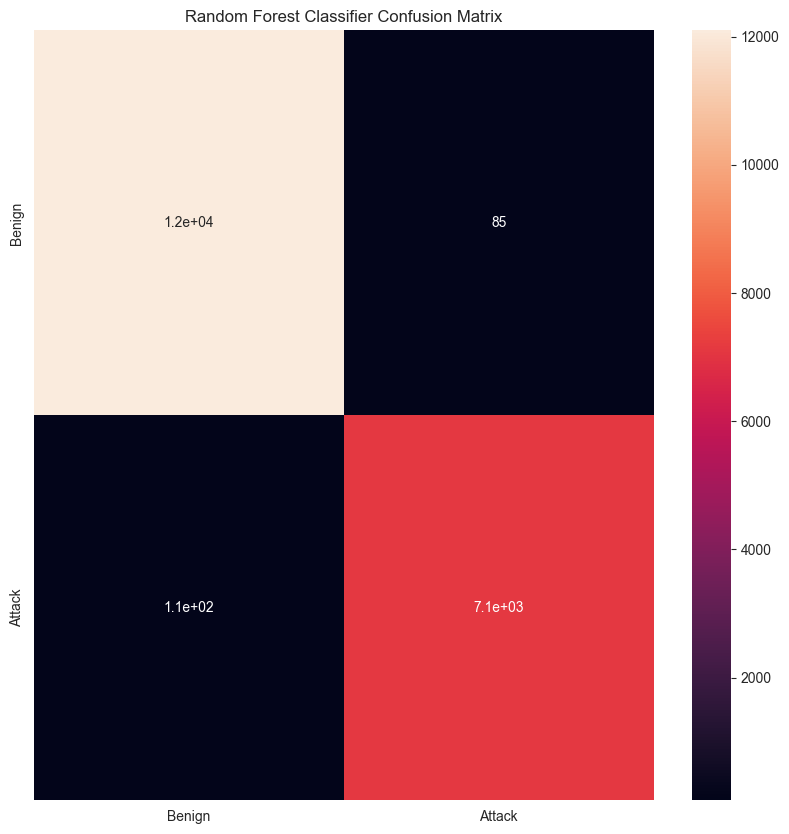

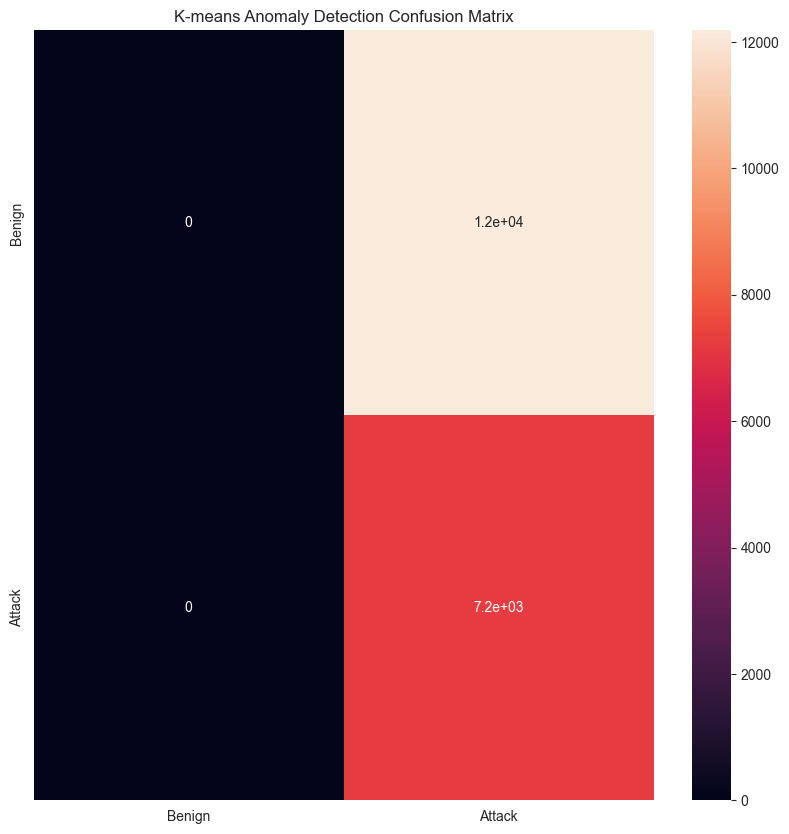

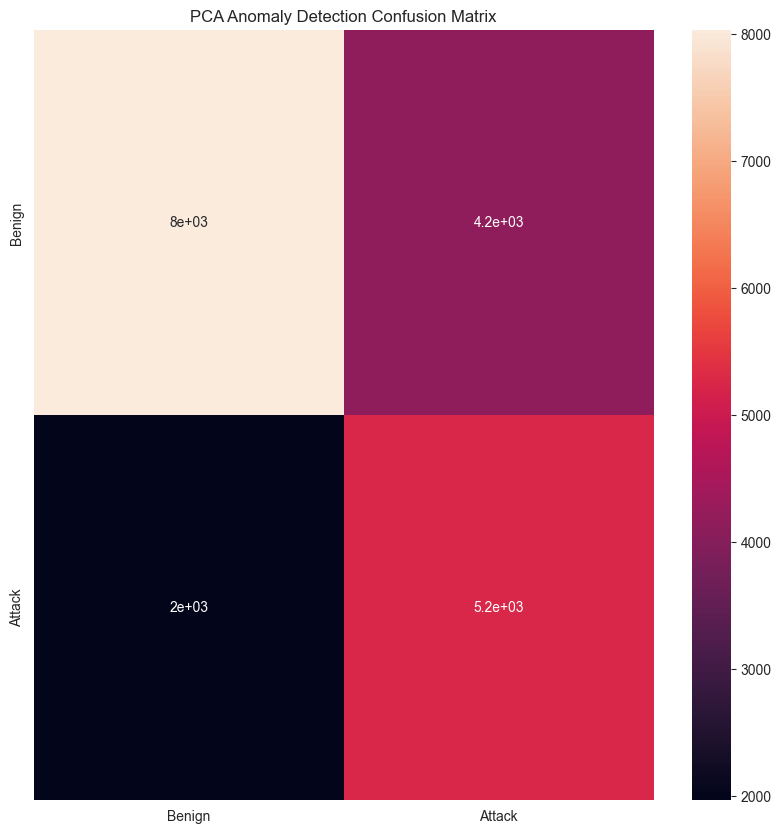

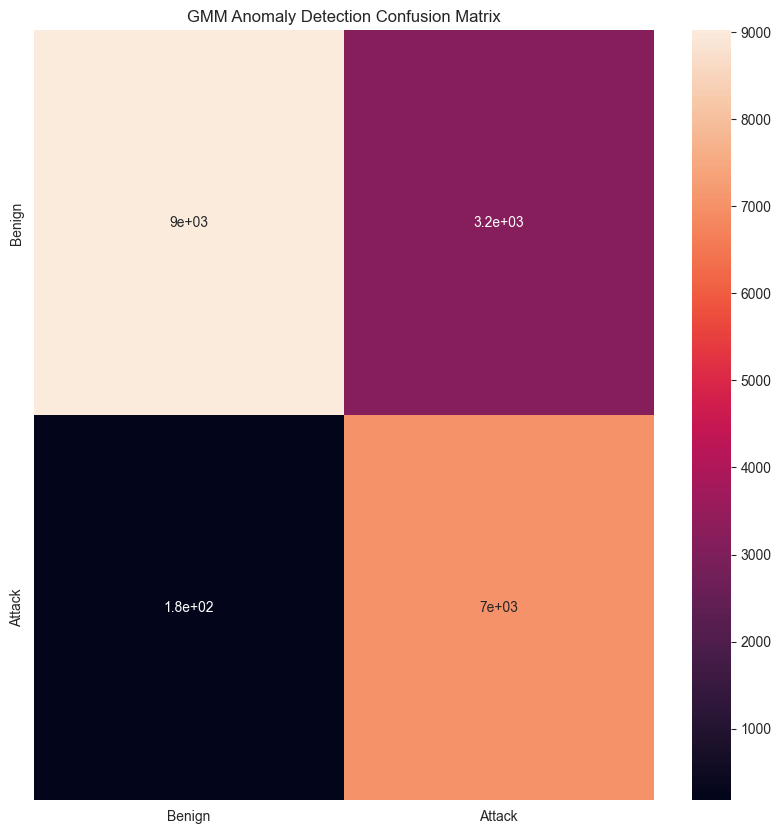

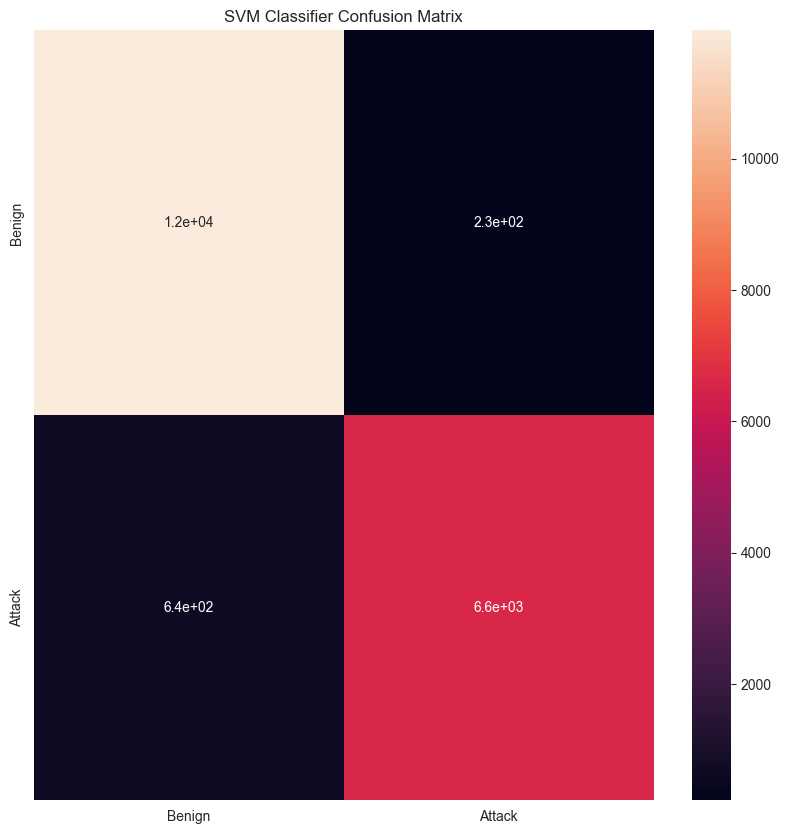

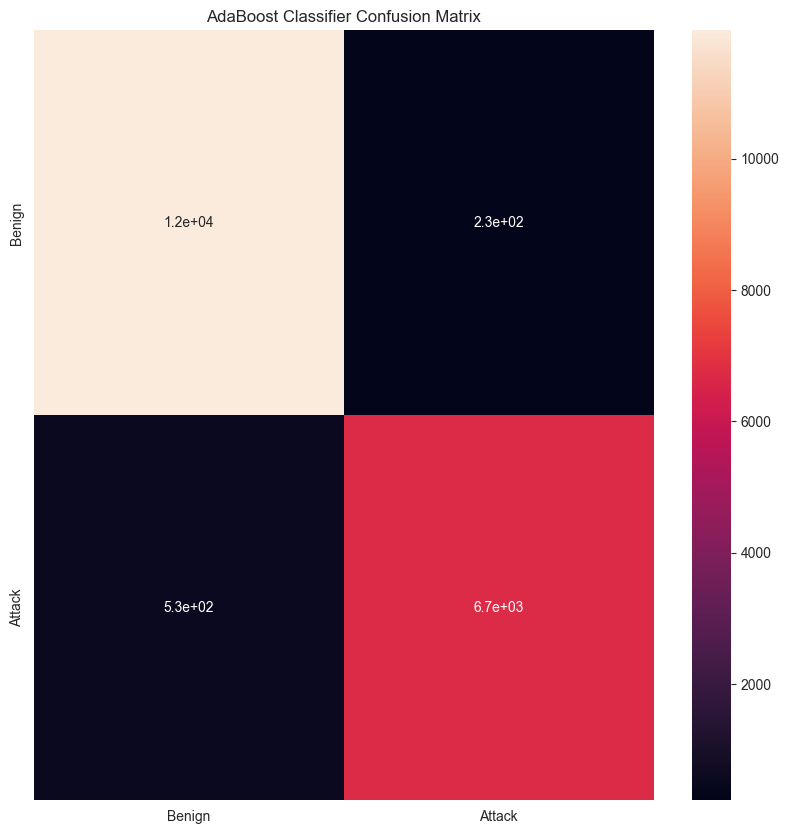

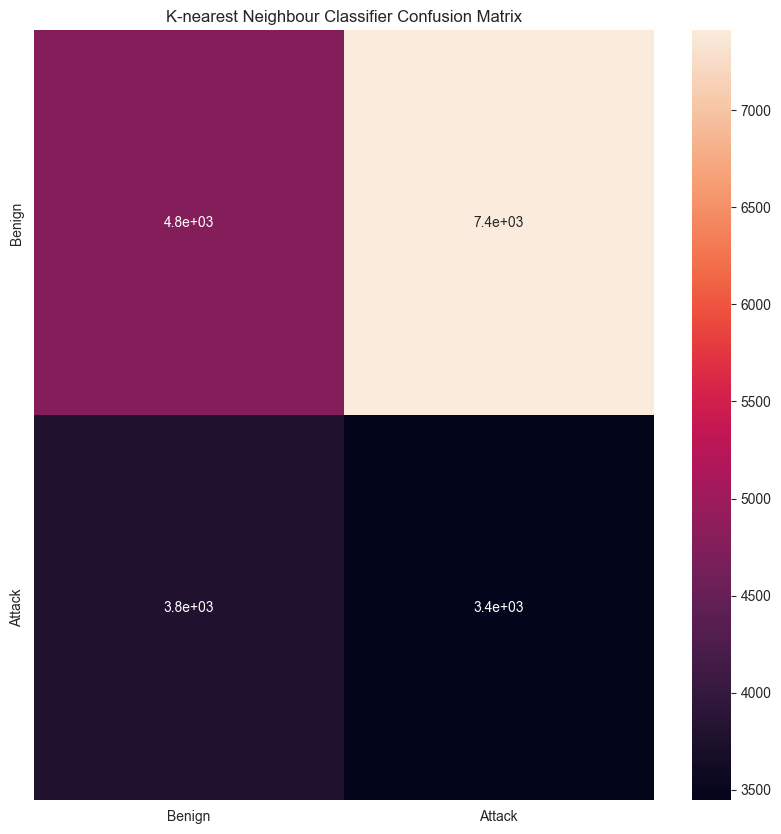

In [3]:
model_names = [
    'Random Forest Classifier',
    'K-means Anomaly Detection',
    'PCA Anomaly Detection',
    'GMM Anomaly Detection',
    'SVM Classifier',
    'AdaBoost Classifier',
    'K-nearest Neighbour Classifier',
]

for model, name in zip(models, model_names):
    confusion, f_score, accuracy, precision, recall = model.get_metrics()
    confusion_matrix = DataFrame(confusion, index=['Benign', 'Attack'], columns=['Benign', 'Attack'])
    scores = DataFrame([accuracy, precision, recall, f_score], index=['Accuracy', 'Precision', 'Recall', 'F1-Score'], columns=[f'{name} Scores'])

    plt.figure(figsize=(10,10))
    plt.title(f'{name} Confusion Matrix')
    heatmap(confusion_matrix, annot=True)
    #plt.savefig(f'./out/figures/{name} confusion matrix.png')

    display(scores)